In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv('spotify-2023.csv',encoding='latin-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,213,88,17,946,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,222,43,13,418,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,89,30,13,194,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,210,48,11,953,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,110,66,13,339,170,D,Minor,81,56,48,21,0,8,33


# Overview of DataSet

#### • How many rows and columns does the datase contain?
#### • What are the data types of each column? Are there any missing values?

In [4]:
rows, columns = df.shape
print(f"The DataFrame has {rows} rows and {columns} columns.")

The DataFrame has 953 rows and 24 columns.


In [5]:
data_types = pd.DataFrame(df.dtypes, columns=['Data Type']).reset_index()
data_types.columns = ['Column', 'Data Type']

missing_values = pd.DataFrame(df.isnull().sum(), columns=['Missing Values']).reset_index()
missing_values.columns = ['Column', 'Missing Values']

# Merging data types and missing values
overview_table = pd.merge(data_types, missing_values, on='Column')
display(overview_table)


,Column,Data Type,Missing Values
0,track_name,object,0
1,artist(s)_name,object,0
2,artist_count,int64,0
3,released_year,int64,0
4,released_month,int64,0
5,released_day,int64,0
6,in_spotify_playlists,int64,0
7,in_spotify_charts,int64,0
8,streams,object,0
9,in_apple_playlists,int64,0


 there are some NaN values in columns like in_shazam_charts and key.

# BASIC DESCRIPTIVE STATISTICS

#### • What are the mean, median, and standard deviation of the streams column?
#### • What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

In [8]:

# Statistics for Streams

# Display streams statistics as DataFrame
streams = pd.to_numeric(df['streams'], errors='coerce')  # Convert to numeric, replacing errors with NaN
streams_stats_df = pd.DataFrame({
    "Statistic": ["Mean", "Median", "Standard Deviation"],
    "Streams": [streams.mean(), streams.median(), streams.std()]
})

# Display streams statistics as DataFrame with formatted numbers
print("Statistics for Streams:")
display(streams_stats_df.style.format({"Streams": "{:,.2f}"}))
print("\n")

# Distribution of released_year
year_dist_df = df['released_year'].value_counts().sort_index().reset_index()
year_dist_df.columns = ["Released Year", "Count"]

# Summary Statistics for Released Year
released_year_summary_df = df['released_year'].describe().to_frame(name="Released Year Stats").reset_index()
released_year_summary_df.columns = ["Statistic", "Value"]

# Display year distribution and summary statistics as DataFrames
print("Distribution of Released Year:")
display(year_dist_df)
print("\nSummary Statistics for Released Year:")
display(released_year_summary_df)
print("\n")

# Distribution of artist_count
artist_count_dist_df = df['artist_count'].value_counts().sort_index().reset_index()
artist_count_dist_df.columns = ["Artist Count", "Count"]

# Summary Statistics for Artist Count
artist_count_summary_df = df['artist_count'].describe().to_frame(name="Artist Count Stats").reset_index()
artist_count_summary_df.columns = ["Statistic", "Value"]

# Display artist count distribution and summary statistics as DataFrames
print("Distribution of Artist Count:")
display(artist_count_dist_df)
print("\nSummary Statistics for Artist Count:")
display(artist_count_summary_df)


Statistics for Streams:


,Statistic,Streams
0,Mean,"514,137,424.94"
1,Median,"290,530,915.00"
2,Standard Deviation,"566,856,949.04"




Distribution of Released Year:


,Released Year,Count
0,1930,1
1,1942,1
2,1946,1
3,1950,1
4,1952,1
5,1957,2
6,1958,3
7,1959,2
8,1963,3
9,1968,1



Summary Statistics for Released Year:


,Statistic,Value
0,count,953.000000
1,mean,2018.238195
2,std,11.116218
3,min,1930.000000
4,25%,2020.000000
5,50%,2022.000000
6,75%,2022.000000
7,max,2023.000000




Distribution of Artist Count:


,Artist Count,Count
0,1,587
1,2,254
2,3,85
3,4,15
4,5,5
5,6,3
6,7,2
7,8,2



Summary Statistics for Artist Count:


,Statistic,Value
0,count,953.000000
1,mean,1.556139
2,std,0.893044
3,min,1.000000
4,25%,1.000000
5,50%,1.000000
6,75%,2.000000
7,max,8.000000


# TOP PERFORMER

#### • Which track has the highest number of streams? Display the top 5 most streamed tracks.
#### • Who are the top 5 most frequent artists based on the number of tracks in the dataset?


In [10]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Sort the dataframe by streams in descending order and select the top 5 rows
streams5 = df.nlargest(5, 'streams')

# Select and display the desired columns in a formatted DataFrame
streams5_df = streams5[['track_name', 'artist(s)_name', 'streams']].reset_index(drop=True)

# Display the DataFrame
print("Top 5 Tracks by Streams:")
display(streams5_df)

Top 5 Tracks by Streams:


,track_name,artist(s)_name,streams
0,Blinding Lights,The Weeknd,3.703895e+09
1,Shape of You,Ed Sheeran,3.562544e+09
2,Someone You Loved,Lewis Capaldi,2.887242e+09
3,Dance Monkey,Tones and I,2.864792e+09
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09


In [11]:
# Get the top 5 artists by the number of tracks
artists5 = df['artist(s)_name'].value_counts().head(5).reset_index()
artists5.columns = ["Artist(s) Name", "Number of Tracks"]

# Display the DataFrame
print("Top 5 Artists by Number of Tracks:")
display(artists5)


Top 5 Artists by Number of Tracks:


,Artist(s) Name,Number of Tracks
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17


# TEMPORAL TRENDS

#### • Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.
#### • Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

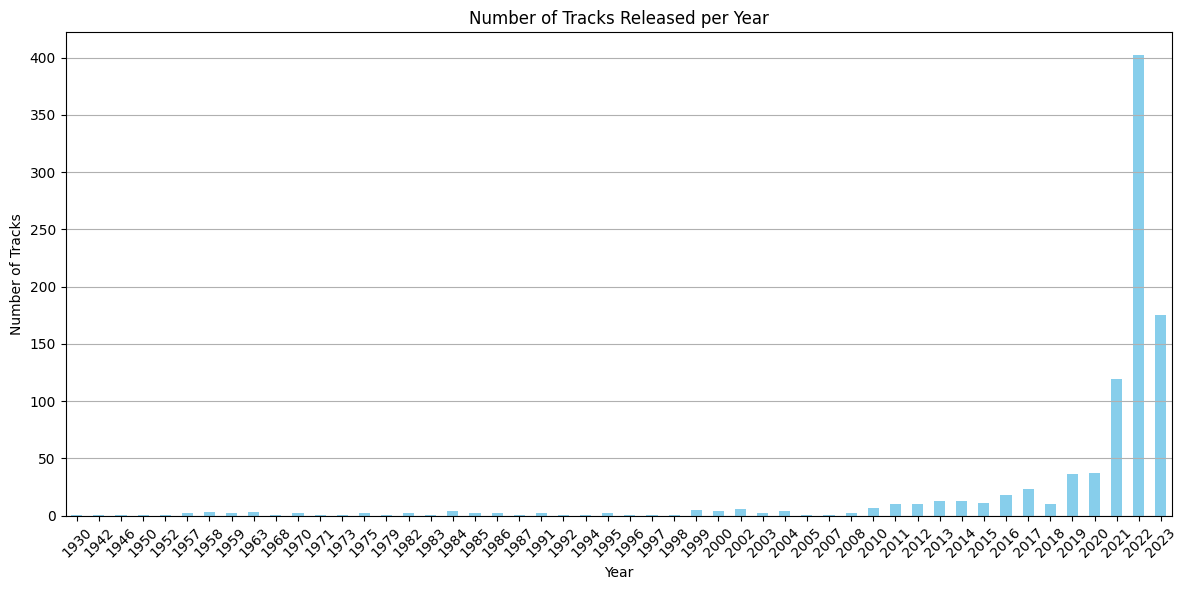

In [13]:
tracks_per_year = df['released_year'].value_counts().sort_index()

# Plotting the number of tracks released per year
plt.figure(figsize=(12, 6))
tracks_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Tracks Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

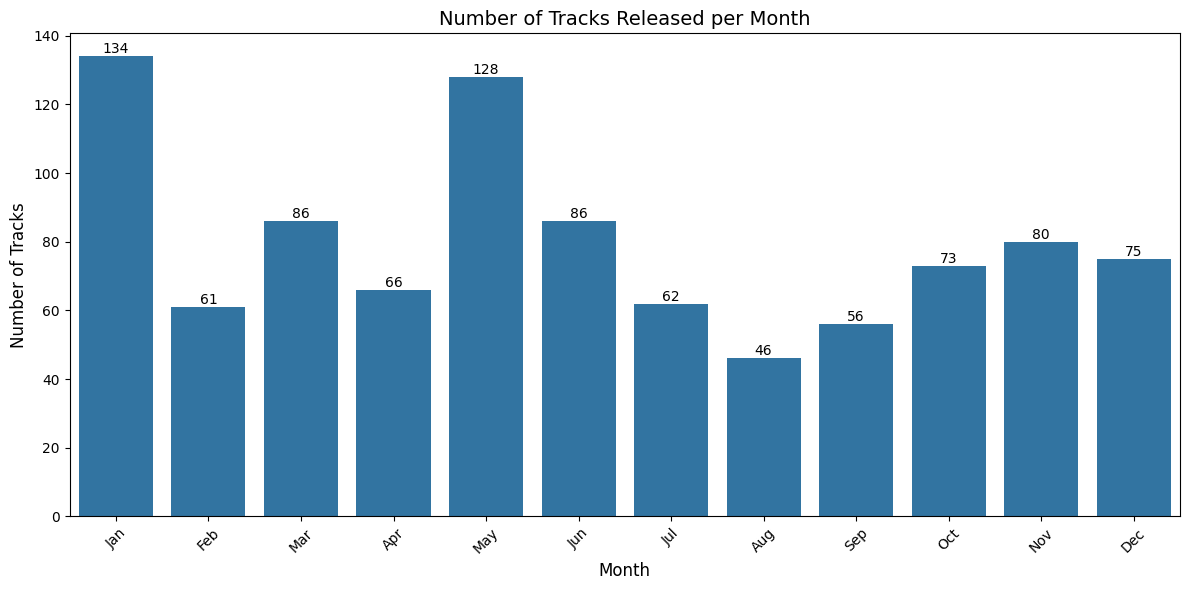


Month with most releases: Jan (134 tracks)


In [14]:
monthly_releases = df['released_month'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_releases.index, y=monthly_releases.values)

# Customize the plot
plt.title('Number of Tracks Released per Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)

# Add month names instead of numbers
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(12), month_names, rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(monthly_releases.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nMonth with most releases:", 
      month_names[monthly_releases.idxmax()-1], 
      f"({monthly_releases.max()} tracks)")


#  Genre and Music Characteristics
#### • Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?
#### •Is there a correlation between deanceability_% and energy_%? How aout valence_% and acousticness_%?



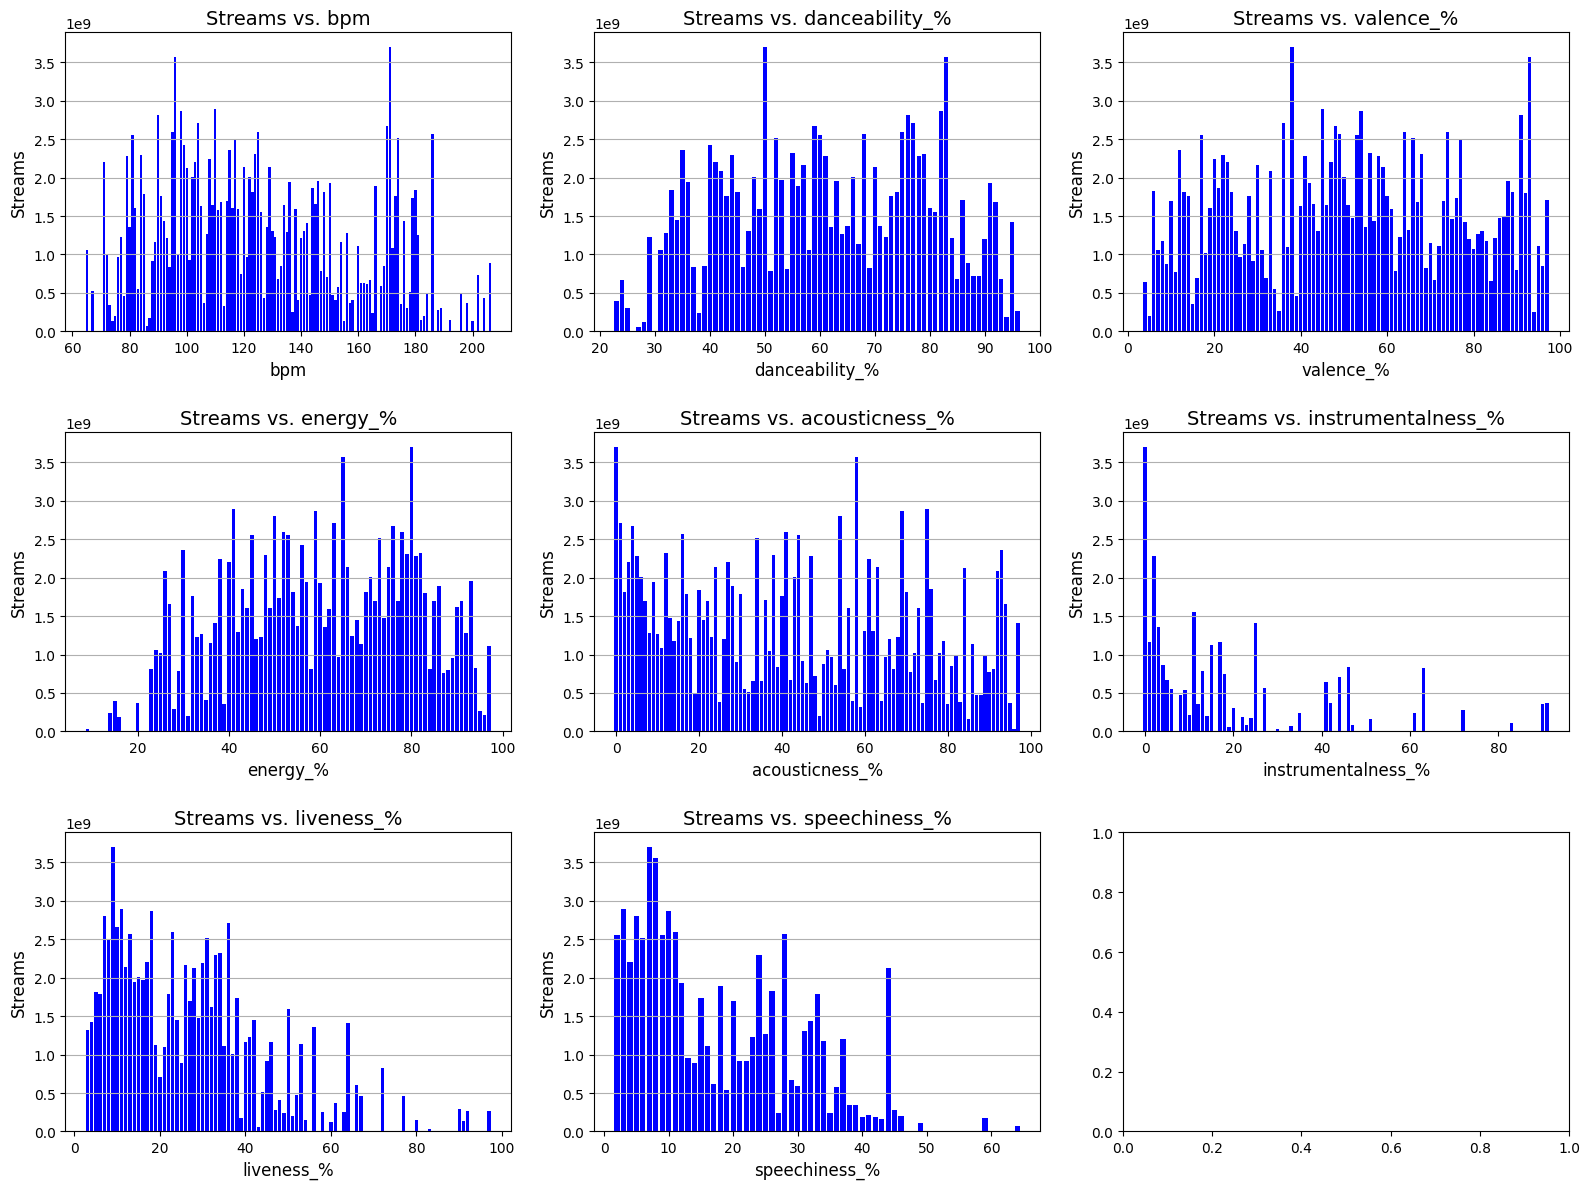

Correlations with Streams:
                     streams
bpm                -0.002438
danceability_%     -0.105457
valence_%          -0.040831
energy_%           -0.026051
acousticness_%     -0.004485
instrumentalness_% -0.044902
liveness_%         -0.048337
speechiness_%      -0.112333


In [46]:
columns_to_plot = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    plt.bar(df[column], df['streams'], color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.grid(axis='y')
plt.tight_layout()
plt.show()
# Calculate and display specific correlations as DataFrames
correlations = df[columns_to_plot + ['streams']].corr()

# Extract specific correlations with 'streams'
streams_correlations = correlations[['streams']].drop('streams')

# Display the correlations as a DataFrame
print("Correlations with Streams:")
print(streams_correlations)

# PLATFORM POPULATIRY

#### • How do the number of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks?

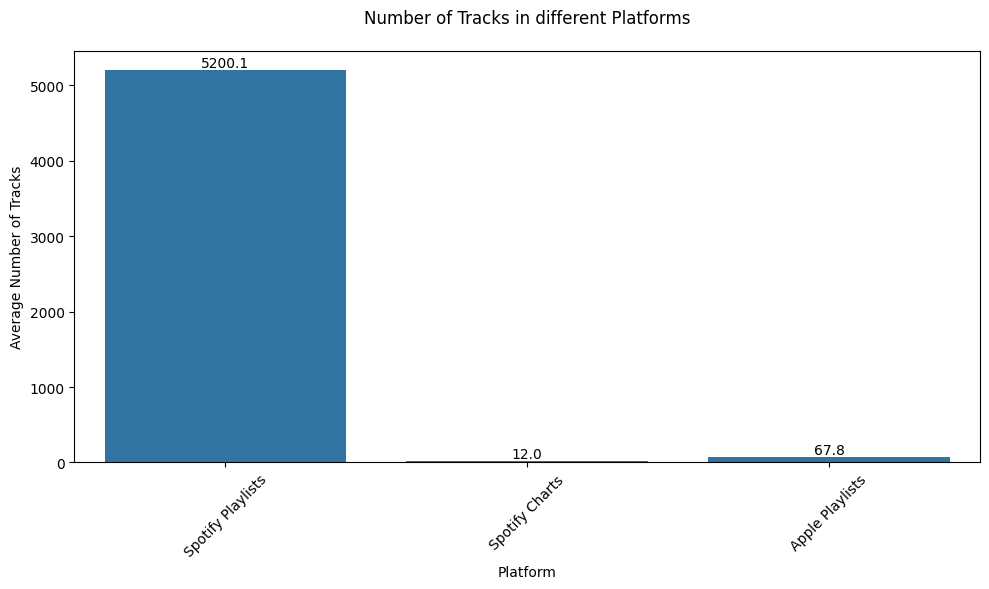


Average Presence by Platform:
Spotify Playlists: 5200.12
Spotify Charts: 12.01
Apple Playlists: 67.81

Platform with highest average presence: Spotify Playlists (5200.12)


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
df_clean = df.copy()

# Convert columns to numeric, replacing any non-numeric values with NaN
df_clean['in_spotify_playlists'] = pd.to_numeric(df_clean['in_spotify_playlists'], errors='coerce')
df_clean['in_spotify_charts'] = pd.to_numeric(df_clean['in_spotify_charts'], errors='coerce')
df_clean['in_apple_playlists'] = pd.to_numeric(df_clean['in_apple_playlists'], errors='coerce')

# Calculate averages
platform_averages = {
    'Spotify Playlists': df_clean['in_spotify_playlists'].mean(),
    'Spotify Charts': df_clean['in_spotify_charts'].mean(),
    'Apple Playlists': df_clean['in_apple_playlists'].mean()
}

# Create the visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=list(platform_averages.keys()), y=list(platform_averages.values()))

# Customize the plot
plt.title('Number of Tracks in different Platforms', pad=20)
plt.xlabel('Platform')
plt.ylabel('Average Number of Tracks')
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(platform_averages.values()):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print the results
print("\nAverage Presence by Platform:")
for platform, avg in platform_averages.items():
    print(f"{platform}: {avg:.2f}")

# Find the platform with highest presence
max_platform = max(platform_averages.items(), key=lambda x: x[1])
print(f"\nPlatform with highest average presence: {max_platform[0]} ({max_platform[1]:.2f})")

# ADVANCE ANALYSIS

#### • Based on the streams data, can you indentify any patterns among tracks with the same key or mode(Major vs Minor)?
#### • Do certain genres or artists consistenly appear in more playlists or charts? Perfrom an analysus to compare the most frequently appearing artists in playlist or charts.

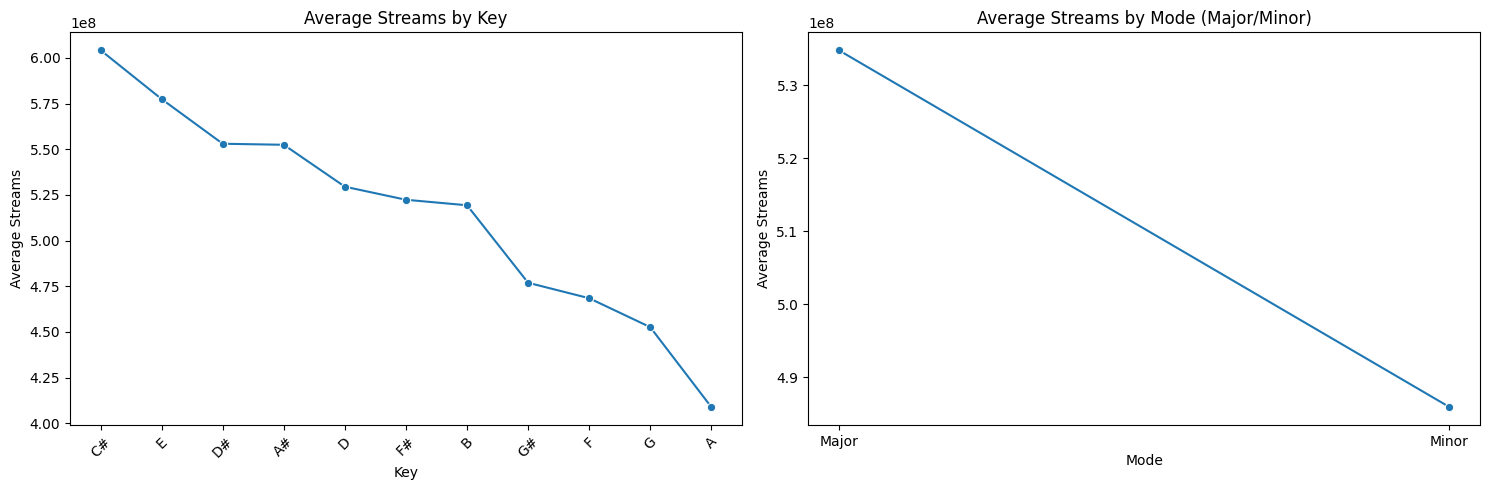

In [20]:
       # Calculate average streams by key and mode
key_streams = df.groupby('key')['streams'].mean().sort_values(ascending=False)
mode_streams = df.groupby('mode')['streams'].mean()
    
    # Plotting
plt.figure(figsize=(15, 5))
    
    # Plot 1: Line plot for Streams by Key
plt.subplot(1, 2, 1)
sns.lineplot(x=key_streams.index, y=key_streams.values, marker="o")
plt.title('Average Streams by Key')
plt.xlabel('Key')
plt.ylabel('Average Streams')
plt.xticks(rotation=45)
    
    # Plot 2: Line plot for Streams by Mode
plt.subplot(1, 2, 2)
sns.lineplot(x=mode_streams.index, y=mode_streams.values, marker="o")
plt.title('Average Streams by Mode (Major/Minor)')
plt.xlabel('Mode')
plt.ylabel('Average Streams')
    
plt.tight_layout()
plt.show()

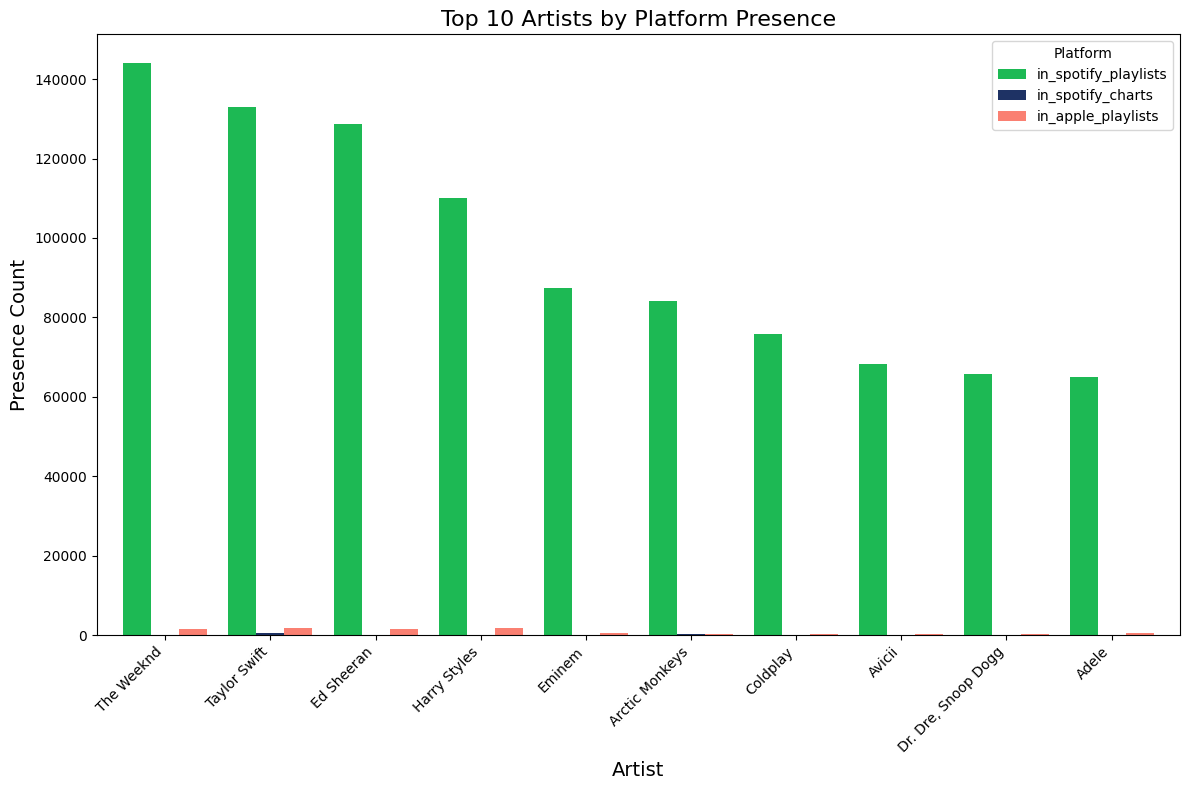

In [21]:
# Calculate artist metrics
artist_metrics = df.groupby('artist(s)_name').agg({
    'in_spotify_playlists': 'sum',
    'in_spotify_charts': 'sum',
    'in_apple_playlists': 'sum',
}).reset_index()

# Calculate total platform presence
artist_metrics['total_presence'] = (
    artist_metrics['in_spotify_playlists'] + 
    artist_metrics['in_spotify_charts'] + 
    artist_metrics['in_apple_playlists']
)

# Get top 10 artists by total presence
top_artists = artist_metrics.nlargest(10, 'total_presence').set_index('artist(s)_name')

# Define colors for each playlist type
colors = ['#1DB954', '#1E3264', '#FA8072']

# Plot side-by-side bar chart
ax = top_artists[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']].plot(
    kind='bar',
    color=colors,
    figsize=(12, 8),
    width=0.8  # Control width of bars for better spacing
)

# Enhance chart labels and style
ax.set_title('Top 10 Artists by Platform Presence', fontsize=16)
ax.set_xlabel('Artist', fontsize=14)
ax.set_ylabel('Presence Count', fontsize=14)
ax.legend(title="Platform", loc="upper right")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


Successfully loaded with latin1 encoding

=== Analysis of Streams by Key and Mode ===


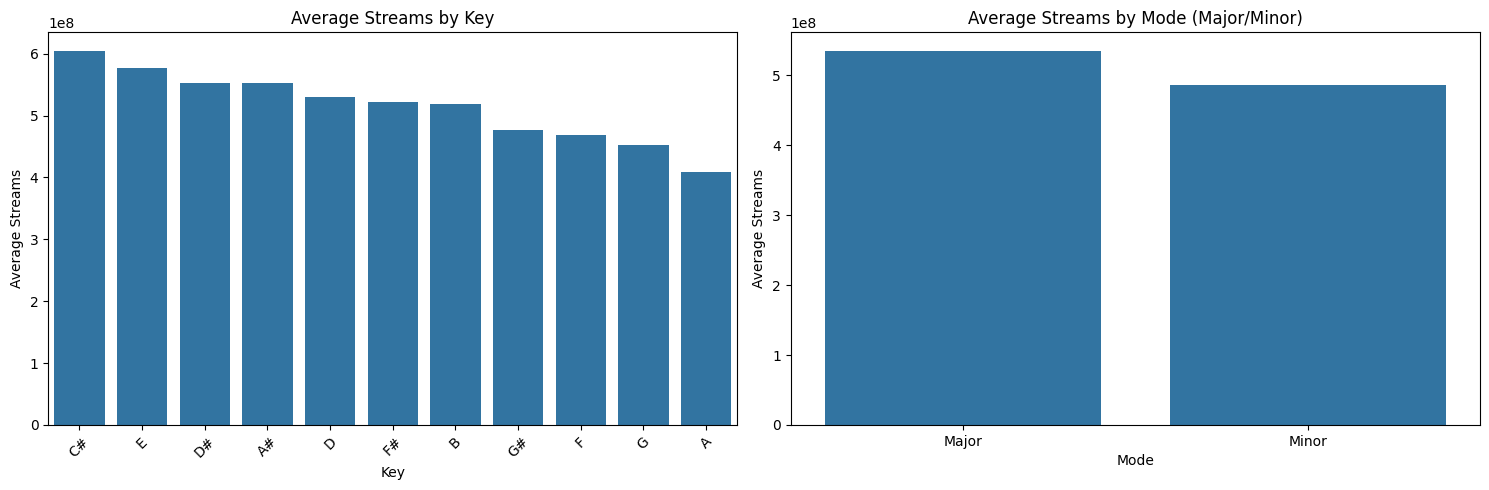


Key with highest average streams: C#
Mode comparison:
mode
Major    5.348328e+08
Minor    4.859445e+08
Name: streams, dtype: float64

=== Analysis of Artist Presence in Playlists and Charts ===


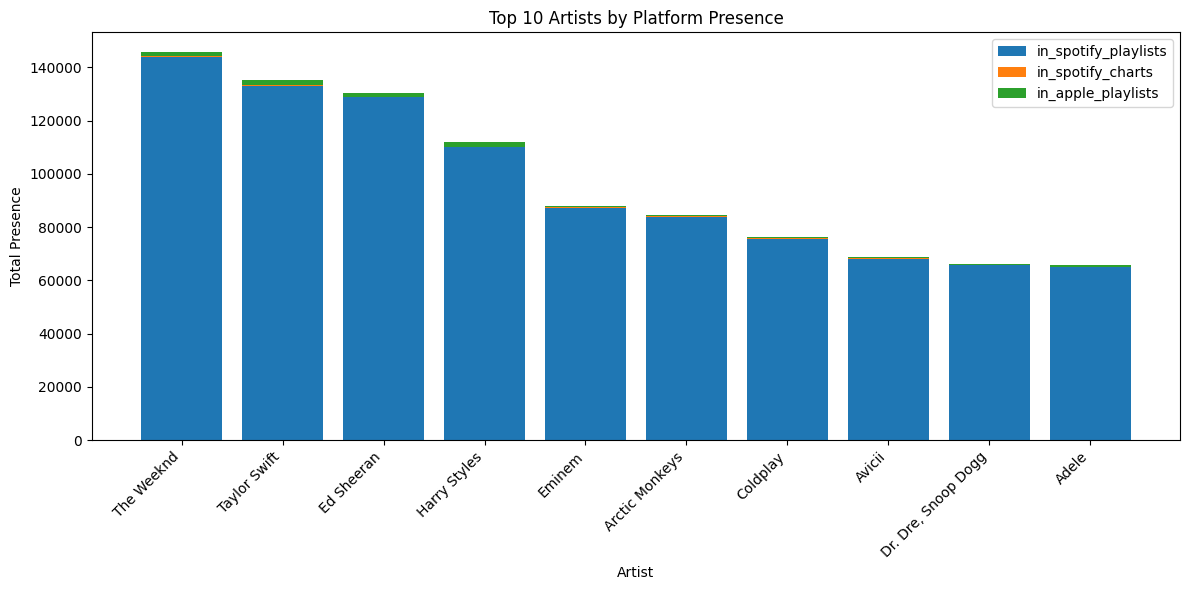


Top 5 Artists by Platform Presence:
    artist(s)_name  total_presence       streams
572     The Weeknd          145910  1.418555e+10
558   Taylor Swift          135312  1.405366e+10
159     Ed Sheeran          130300  1.390895e+10
223   Harry Styles          111952  1.160865e+10
171         Eminem           87958  6.183806e+09

=== Correlation Analysis ===


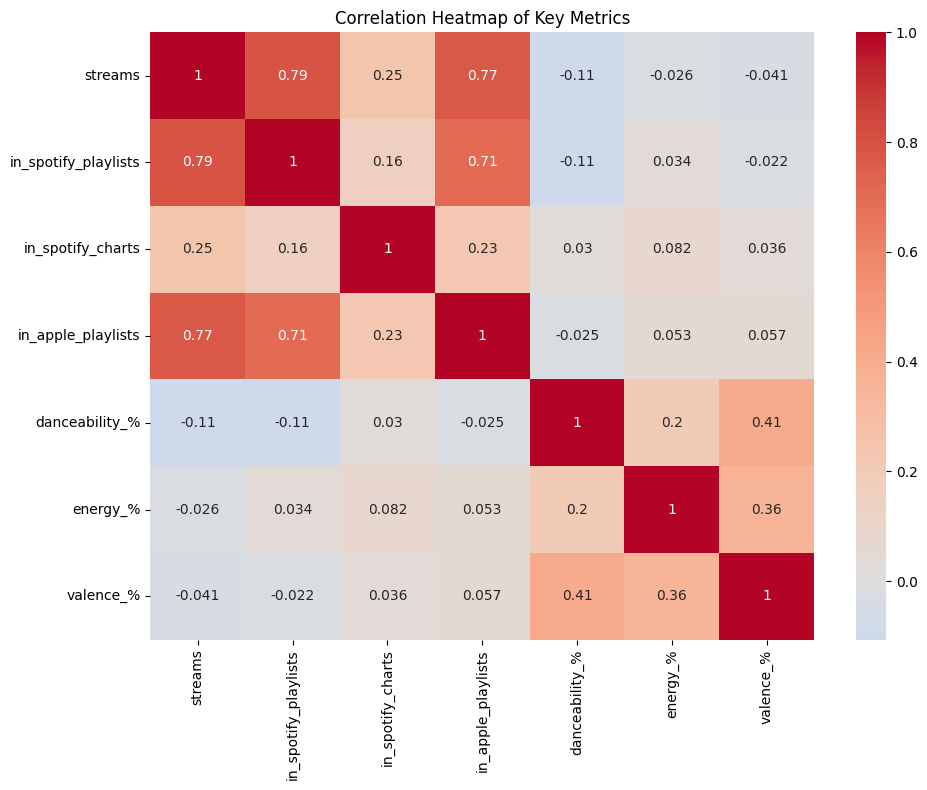

In [22]:


# 1. Analysis of Streams by Key and Mode
def analyze_key_mode_patterns(df):
    print("\n=== Analysis of Streams by Key and Mode ===")
    
    # Calculate average streams by key
    key_streams = df.groupby('key')['streams'].mean().sort_values(ascending=False)
    
    # Calculate average streams by mode
    mode_streams = df.groupby('mode')['streams'].mean()
    
    # Plotting
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Streams by Key
    plt.subplot(1, 2, 1)
    sns.barplot(x=key_streams.index, y=key_streams.values)
    plt.title('Average Streams by Key')
    plt.xlabel('Key')
    plt.ylabel('Average Streams')
    plt.xticks(rotation=45)
    
    # Plot 2: Streams by Mode
    plt.subplot(1, 2, 2)
    sns.barplot(x=mode_streams.index, y=mode_streams.values)
    plt.title('Average Streams by Mode (Major/Minor)')
    plt.xlabel('Mode')
    plt.ylabel('Average Streams')
    
    plt.tight_layout()
    plt.show()
    
    # Statistical summary
    print("\nKey with highest average streams:", key_streams.index[0])
    print("Mode comparison:")
    print(mode_streams)

# 2. Analysis of Artists in Playlists and Charts
def analyze_artist_presence(df):
    print("\n=== Analysis of Artist Presence in Playlists and Charts ===")
    
    # Create a DataFrame with artist and their playlist/chart presence
    artist_metrics = df.groupby('artist(s)_name').agg({
        'in_spotify_playlists': 'sum',
        'in_spotify_charts': 'sum',
        'in_apple_playlists': 'sum',
        'streams': 'sum'
    }).reset_index()
    
    # Sort by total presence across all platforms
    artist_metrics['total_presence'] = (artist_metrics['in_spotify_playlists'] + 
                                      artist_metrics['in_spotify_charts'] + 
                                      artist_metrics['in_apple_playlists'])
    
    # Get top 10 artists by presence
    top_artists = artist_metrics.nlargest(10, 'total_presence')
    
    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Create a stacked bar chart
    bottom = np.zeros(len(top_artists))
    
    for column in ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']:
        plt.bar(top_artists['artist(s)_name'], top_artists[column], bottom=bottom, label=column)
        bottom += top_artists[column]
    
    plt.title('Top 10 Artists by Platform Presence')
    plt.xlabel('Artist')
    plt.ylabel('Total Presence')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\nTop 5 Artists by Platform Presence:")
    print(top_artists[['artist(s)_name', 'total_presence', 'streams']].head().to_string())

# 3. Correlation Analysis
def analyze_correlations(df):
    print("\n=== Correlation Analysis ===")
    
    # Calculate correlations between key metrics
    correlation_metrics = ['streams', 'in_spotify_playlists', 'in_spotify_charts', 
                         'in_apple_playlists', 'danceability_%', 'energy_%', 'valence_%']
    
    correlations = df[correlation_metrics].corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Key Metrics')
    plt.tight_layout()
    plt.show()

# Main execution
def main():
    # Load your DataFrame here with a different encoding
    try:
        # Try different encodings
        encodings = ['latin1', 'iso-8859-1', 'cp1252']
        df = None
        
        for encoding in encodings:
            try:
                df = pd.read_csv('spotify-2023.csv', encoding=encoding)
                print(f"Successfully loaded with {encoding} encoding")
                break
            except UnicodeDecodeError:
                continue
        
        if df is None:
            raise Exception("Could not read the file with any of the attempted encodings")
        
        # Clean and prepare data
        df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
        df['in_spotify_playlists'] = pd.to_numeric(df['in_spotify_playlists'], errors='coerce')
        df['in_spotify_charts'] = pd.to_numeric(df['in_spotify_charts'], errors='coerce')
        df['in_apple_playlists'] = pd.to_numeric(df['in_apple_playlists'], errors='coerce')
        
        # Run analyses
        analyze_key_mode_patterns(df)
        analyze_artist_presence(df)
        analyze_correlations(df)
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()

Successfully loaded with latin1 encoding

=== Analysis of Streams by Key and Mode ===


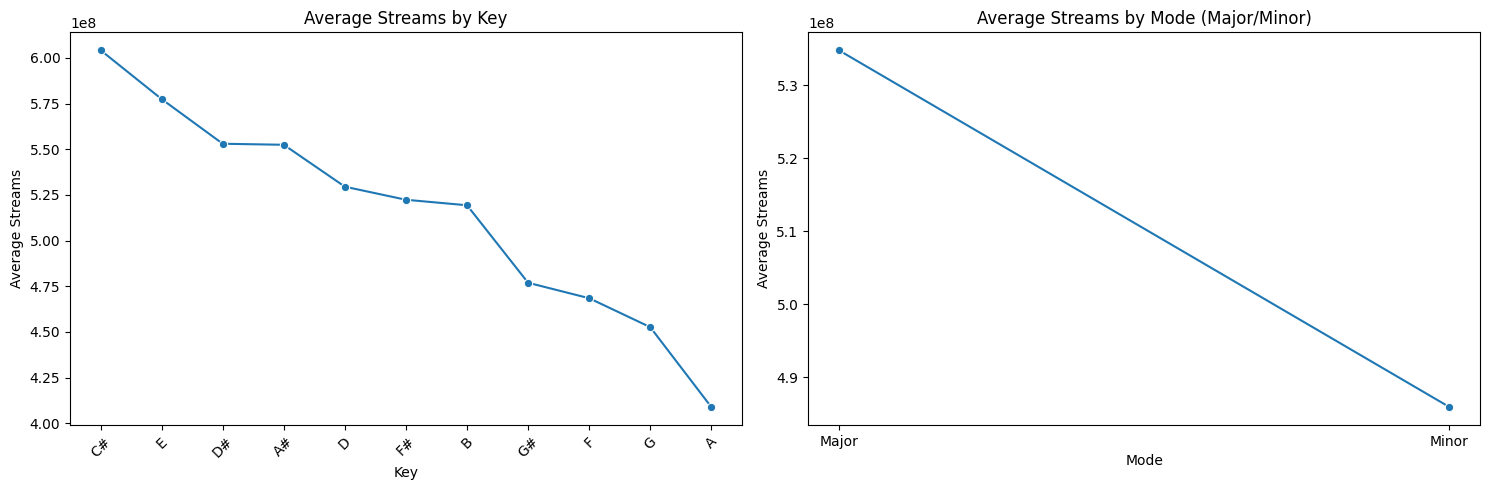


Key with highest average streams: C#
Mode comparison:
mode
Major    5.348328e+08
Minor    4.859445e+08
Name: streams, dtype: float64

=== Analysis of Artist Presence in Playlists and Charts ===


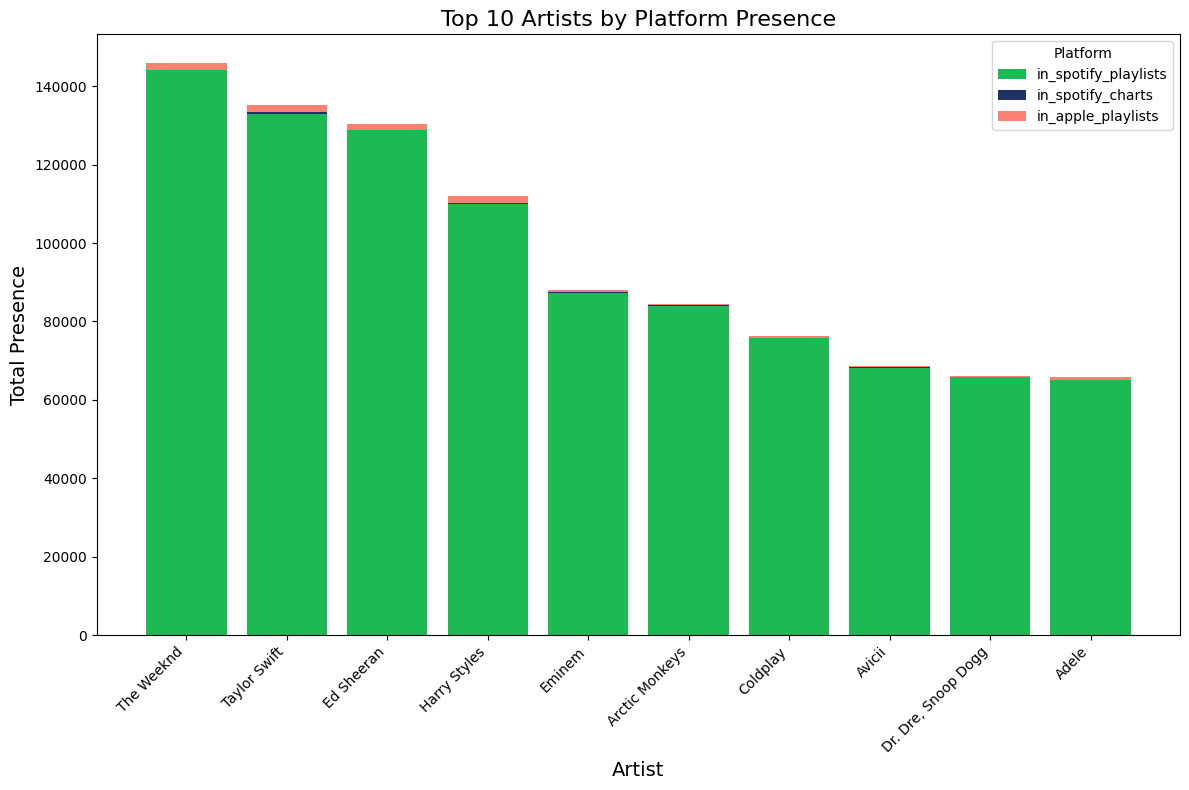


Top 5 Artists by Platform Presence:
    artist(s)_name  total_presence       streams
572     The Weeknd          145910  1.418555e+10
558   Taylor Swift          135312  1.405366e+10
159     Ed Sheeran          130300  1.390895e+10
223   Harry Styles          111952  1.160865e+10
171         Eminem           87958  6.183806e+09

=== Correlation Analysis ===


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Analysis of Streams by Key and Mode
def analyze_key_mode_patterns(df):
    print("\n=== Analysis of Streams by Key and Mode ===")
    
    # Calculate average streams by key and mode
    key_streams = df.groupby('key')['streams'].mean().sort_values(ascending=False)
    mode_streams = df.groupby('mode')['streams'].mean()
    
    # Plotting
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Line plot for Streams by Key
    plt.subplot(1, 2, 1)
    sns.lineplot(x=key_streams.index, y=key_streams.values, marker="o")
    plt.title('Average Streams by Key')
    plt.xlabel('Key')
    plt.ylabel('Average Streams')
    plt.xticks(rotation=45)
    
    # Plot 2: Line plot for Streams by Mode
    plt.subplot(1, 2, 2)
    sns.lineplot(x=mode_streams.index, y=mode_streams.values, marker="o")
    plt.title('Average Streams by Mode (Major/Minor)')
    plt.xlabel('Mode')
    plt.ylabel('Average Streams')
    
    plt.tight_layout()
    plt.show()
    
    # Statistical summary
    print("\nKey with highest average streams:", key_streams.index[0])
    print("Mode comparison:")
    print(mode_streams)

# 2. Analysis of Artists in Playlists and Charts
def analyze_artist_presence(df):
    print("\n=== Analysis of Artist Presence in Playlists and Charts ===")
    
    # Create a DataFrame with artist and their playlist/chart presence
    artist_metrics = df.groupby('artist(s)_name').agg({
        'in_spotify_playlists': 'sum',
        'in_spotify_charts': 'sum',
        'in_apple_playlists': 'sum',
        'streams': 'sum'
    }).reset_index()
    
    # Sort by total presence across all platforms
    artist_metrics['total_presence'] = (artist_metrics['in_spotify_playlists'] + 
                                      artist_metrics['in_spotify_charts'] + 
                                      artist_metrics['in_apple_playlists'])
    
    # Get top 10 artists by presence
    top_artists = artist_metrics.nlargest(10, 'total_presence')
    
    # Plotting
    plt.figure(figsize=(12, 8))
    
    # Improved stacked bar chart with labels for each platform
    bottom = np.zeros(len(top_artists))
    colors = ['#1DB954', '#1E3264', '#FA8072']  # Distinct colors for platforms
    
    for i, column in enumerate(['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']):
        plt.bar(top_artists['artist(s)_name'], top_artists[column], bottom=bottom, label=column, color=colors[i])
        bottom += top_artists[column]
    
    # Adding labels and enhancing aesthetics
    plt.title('Top 10 Artists by Platform Presence', fontsize=16)
    plt.xlabel('Artist', fontsize=14)
    plt.ylabel('Total Presence', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Platform", loc="upper right")
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\nTop 5 Artists by Platform Presence:")
    print(top_artists[['artist(s)_name', 'total_presence', 'streams']].head().to_string())

# 3. Correlation Analysis
def analyze_correlations(df):
    print("\n=== Correlation Analysis ===")
    
    # Calculate correlations between key metrics
    correlation_metrics = ['streams', 'in_spotify_playlists', 'in_spotify_charts', 
                         'in_apple_playlists', 'danceability_%', 'energy_%', 'valence_%']
    
    correlations = df[correlation_metrics].corr()
    
    # Plot correlation heatmap

# Main execution
def main():
    # Load your DataFrame here with a different encoding
    try:
        # Try different encodings
        encodings = ['latin1', 'iso-8859-1', 'cp1252']
        df = None
        
        for encoding in encodings:
            try:
                df = pd.read_csv('spotify-2023.csv', encoding=encoding)
                print(f"Successfully loaded with {encoding} encoding")
                break
            except UnicodeDecodeError:
                continue
        
        if df is None:
            raise Exception("Could not read the file with any of the attempted encodings")
        
        # Clean and prepare data
        for col in ['streams', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Run analyses
        analyze_key_mode_patterns(df)
        analyze_artist_presence(df)
        analyze_correlations(df)
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()
